# TD1: Simulations de données et diagramme de persistance

L’Analyse Topologique des Données (TDA) est un domaine récent des mathématiques appliquées, qui cherche à analyser les jeux de données en s’intéressant à leurs ”structures topologiques”. Il vise à comprendre et exploiter la structure topologique et géométrique sous-jacente à des donn ́ees complexes souvent représentées par des nuages de points dans des espaces euclidiens ou des espaces métriques plus généraux. Ainsi grâce à un ensemble de méthodes et d’algorithmes, on arrive à estimer les propriétés topologiques de notre jeu de données. On a choisit de présenter les différents outils et notions mathématiques, principalement emprunter à la topologie algébrique, sur lesquelles repose la TDA.

# Simplex trees and simpicial complexes (Chazal)

TDA typically aims at extracting topological signatures from a point cloud in $\mathbb{R}^d$ or in a general metric space. By studying the topology of a point cloud, we actually mean studying the topology of the unions of balls centered at the point cloud, also called offsets. However, non-discrete sets such as offsets, and also continuous mathematical shapes like curves, surfaces and more generally manifolds, cannot easily be encoded as finite discrete structures. Simplicial complexes are therefore used in computational geometry to approximate such shapes.

A simplicial complex is a set of simplices, they can be seen as higher dimensional generalization of graphs. These are mathematical objects that are both topological and combinatorial, a property making them particularly useful for TDA. The challenge here is to define such structures that are proven to reflect relevant information about the structure of data and that can be effectively constructed and manipulated in practice. 

A filtration is an increasing sequence of sub-complexes of a simplicial complex $\mathcal{K}$. It can be seen as ordering the simplices included in the complex $\mathcal{K}$. Indeed, simpicial complexes often come with a specific order, as for Vietoris-Rips complexes, Cech complexes and alpha complexes.

# Allons-y!

In [1]:
#Python (>= 3.6)
#NumPy (>= 1.19.1)
#SciPy (>= 1.5.0)
#joblib (>= 0.16.0)
#scikit-learn (>= 0.23.1)
#pyflagser (>= 0.4.1)
#python-igraph (>= 0.8.2)
#plotly (>= 4.8.2)
#ipywidgets (>= 7.5.1)

#pip install jupyterlab

#gtda installer (python -m pip install -U giotto-tda)
import numpy as np
np.random.seed(seed=42)
from gtda.homology import VietorisRipsPersistence
from sklearn.datasets import make_circles

In [9]:
help(VietorisRipsPersistence)

Help on class VietorisRipsPersistence in module gtda.homology.simplicial:

class VietorisRipsPersistence(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin, gtda.base.PlotterMixin)
 |  VietorisRipsPersistence(metric='euclidean', metric_params={}, homology_dimensions=(0, 1), collapse_edges=False, coeff=2, max_edge_length=inf, infinity_values=None, reduced_homology=True, n_jobs=None)
 |  
 |  :ref:`Persistence diagrams <persistence_diagram>` resulting from
 |  :ref:`Vietoris–Rips filtrations
 |  <vietoris-rips_complex_and_vietoris-rips_persistence>`.
 |  
 |  Given a :ref:`point cloud <distance_matrices_and_point_clouds>` in
 |  Euclidean space, an abstract :ref:`metric space
 |  <distance_matrices_and_point_clouds>` encoded by a distance matrix, or the
 |  adjacency matrix of a weighted undirected graph, information about the
 |  appearance and disappearance of topological features (technically,
 |  :ref:`homology classes <homology_and_cohomology>`) of various dimensions
 |  and 

In [2]:
#Cercle avec bruit Gaussien (en faisant varier la variance du bruit)
X = np.asarray([
    make_circles(60, noise=np.random.random(), factor=np.random.random())[0]
    for i in range(10)
])

In [3]:
# Diagrammes de Persistence pour la filtration de V-Rips 
from gtda.plotting import plot_point_cloud
i = 0
plot_point_cloud(X[i])

In [4]:
# Initialize the Vietoris–Rips transformer
VR = VietorisRipsPersistence(homology_dimensions=[0,1,2])

In [5]:
# Create n_samples point clouds of n_points points
n_samples = 10
n_points = 60
point_clouds = np.random.random((n_samples, n_points, 2))

# Compute persistence diagrams of all point clouds
diags = VR.fit_transform(point_clouds)

In [6]:
from gtda.plotting import plot_point_cloud
plot_point_cloud(point_clouds[9])

In [7]:
diags.shape

(10, 76, 3)

# Diagramme de persistence

En analyse topologique de données (ATD), un diagramme de persistance est utilisé pour visualiser et analyser la structure topologique des données.

Plus précisément, un diagramme de persistance en ATD représente les changements de topologie d'un ensemble de données à mesure que la résolution spatiale ou la densité des données varie. Il montre les composantes connexes de l'ensemble de données et comment elles se connectent et se déconnectent au fil du temps, ce qui permet d'identifier les caractéristiques topologiques importantes de l'ensemble de données.

En utilisant des algorithmes tels que la transformée de Morse-Smale ou la transformée de persistence, les diagrammes de persistance en ATD peuvent également être utilisés pour extraire des caractéristiques topologiques telles que les trous, les boucles et les points critiques, qui peuvent ensuite être utilisées pour des analyses ultérieures.

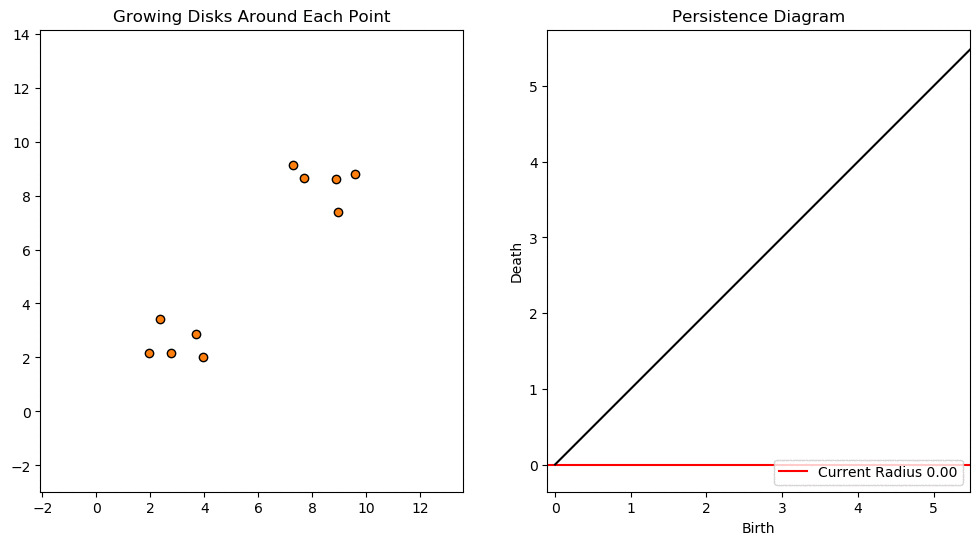 towardsdatascience.com/persistent-homology-with-examples-1974d4b9c3d0.

# Construct a simplicial complex 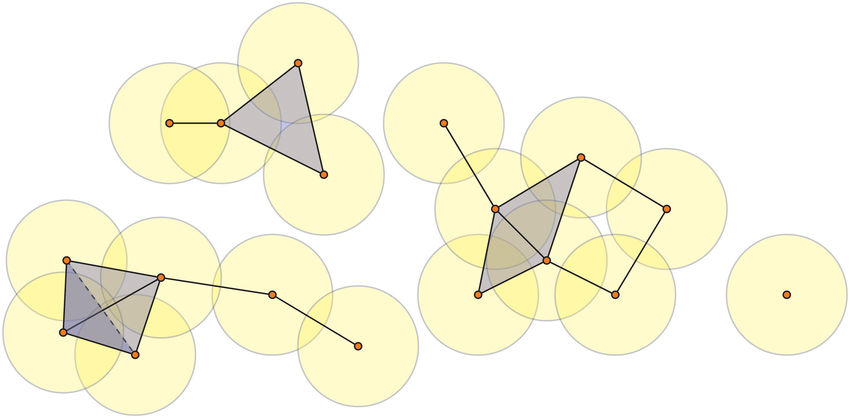

# K-simplex 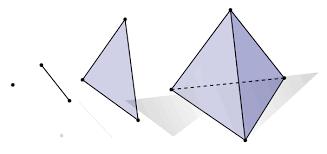

# Linking simplices 
X=\{a,b,c,d,e,[a,b],[b,c],[c,d],[d,e],[e,a],[b,e],[a,b,e]\}\,.  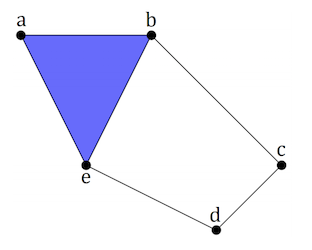

In [8]:
VR.plot(diags, sample=0)

Le diagramme de persistance est un moyen de résumer la structure topologique d'un ensemble de données. Il le fait en identifiant les caractéristiques topologiques importantes de l'ensemble de données, telles que les trous, les boucles et les cavités, et en les représentant sous la forme d'un diagramme.

Le diagramme de persistance est construit en utilisant la notion de "naissances" et "morts" de caractéristiques topologiques. Plus précisément, on commence par construire une famille de formes, appelée "filtration", qui capture progressivement la structure topologique de l'ensemble de données. Ensuite, on suit l'apparition et la disparition des caractéristiques topologiques dans cette filtration. Par exemple, un trou peut apparaître dans une étape de la filtration et disparaître à une étape ultérieure.

Le diagramme de persistance est représenté graphiquement en utilisant un axe horizontal pour représenter les étapes de la filtration et un axe vertical pour représenter la durée de vie des caractéristiques topologiques. Les points dans le diagramme de persistance représentent les caractéristiques topologiques et leur durée de vie.

En utilisant le diagramme de persistance, on peut extraire des informations sur la complexité topologique de l'ensemble de données, telles que le nombre de trous et de boucles, ainsi que la taille et la forme de ces caractéristiques topologiques. Ces informations peuvent être utilisées pour caractériser l'ensemble de données, pour comparer différents ensembles de données ou pour effectuer des analyses statistiques.

In [17]:
diags2 = VR.fit_transform(X)

In [18]:
VR.plot(diags2, sample=9)

In [19]:
point_clouds

array([[[0.59822529, 0.73566311],
        [0.99834751, 0.93311333],
        [0.6425652 , 0.42124805],
        ...,
        [0.20136378, 0.25862083],
        [0.16470635, 0.33021506],
        [0.75675151, 0.51938586]],

       [[0.20488127, 0.87783008],
        [0.87958185, 0.87057843],
        [0.23879621, 0.45123934],
        ...,
        [0.87120448, 0.76606478],
        [0.78844734, 0.6649849 ],
        [0.26028686, 0.90719503]],

       [[0.67073231, 0.56044063],
        [0.11098947, 0.44705554],
        [0.46035827, 0.86456361],
        ...,
        [0.08709277, 0.61706652],
        [0.11383839, 0.34522314],
        [0.50741194, 0.87422252]],

       ...,

       [[0.56953978, 0.25954178],
        [0.43699589, 0.59356094],
        [0.07308156, 0.62234326],
        ...,
        [0.97307816, 0.22612533],
        [0.30419872, 0.30394251],
        [0.23041666, 0.00147382]],

       [[0.72934479, 0.9668455 ],
        [0.22429348, 0.66304719],
        [0.74189633, 0.84842538],
        .

In [20]:
Xwn = np.asarray([
    make_circles(100, factor=np.random.random())[0]
    for i in range(10)
])

In [21]:
# Diagrammes de Persistence pour la filtration de V-Rips 
from gtda.plotting import plot_point_cloud
i = 0
plot_point_cloud(Xwn[i])

In [22]:
diagsXwn = VR.fit_transform(Xwn)

In [23]:
VR.plot(diagsXwn, sample=0)

In [9]:
#2d-3d exemple
X2, y = make_circles(factor=0.5, random_state=0, noise=0.05)

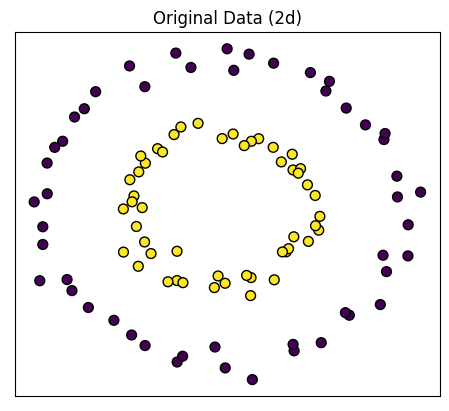

In [10]:
import matplotlib.pyplot as plt
# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8))

ax = plt.subplot(221)
ax.scatter(X2[:, 0], X2[:, 1], c=y, s=50, edgecolor='k')
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()
plt.show()

In [11]:
#if X is a single point cloud ~ a single 3D array
diags3d=VR.fit_transform(X2[None,:,:])
VR.plot(diags3d, sample=0)

In [12]:
#if X list of 2D arrays
diags2d=VR.fit_transform(X2.reshape(1,*X2.shape))
VR.plot(diags2d, sample=0)

# Diagramme de persistence pas à pas

rips_G = gd.RipsComplex(distance_matrix = G , max_edge_length = 1.1)
simplex_tree_G = rips_G.create_simplex_tree(max_dimension =2)
diag_G = np.array(simplex_tree_G.persistence())



#Diagramme de persistence en dimension i:
 def diagm_n(M,i):  
    shape = M.shape
    n_1 = (M==1).sum()
    D = []
    if i == 1:
        D = M[0:n_1,]
        condition = D != 1
        D = np.extract(condition,D)
    if i == 0:
        D = M[n_1 + 2:shape[0]-1,]
        condition = D != 0
        D = np.extract(condition,D)   
    return D 

 diag_G_1 = diagm_n(diag_G,1)
 

Automatically created module for IPython interactive environment


/Users/morilla/Python3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



circles, perplexity=5 in 1.1 sec


/Users/morilla/Python3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



circles, perplexity=30 in 1.2 sec


/Users/morilla/Python3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



circles, perplexity=50 in 1.5 sec


/Users/morilla/Python3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



circles, perplexity=100 in 1.4 sec


/Users/morilla/Python3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



S-curve, perplexity=5 in 1.1 sec


/Users/morilla/Python3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



S-curve, perplexity=30 in 1.3 sec


/Users/morilla/Python3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



S-curve, perplexity=50 in 1.2 sec


/Users/morilla/Python3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



S-curve, perplexity=100 in 1.6 sec


/Users/morilla/Python3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



uniform grid, perplexity=5 in 1.2 sec


/Users/morilla/Python3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



uniform grid, perplexity=30 in 1.3 sec


/Users/morilla/Python3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



uniform grid, perplexity=50 in 1 sec


/Users/morilla/Python3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



uniform grid, perplexity=100 in 1.2 sec


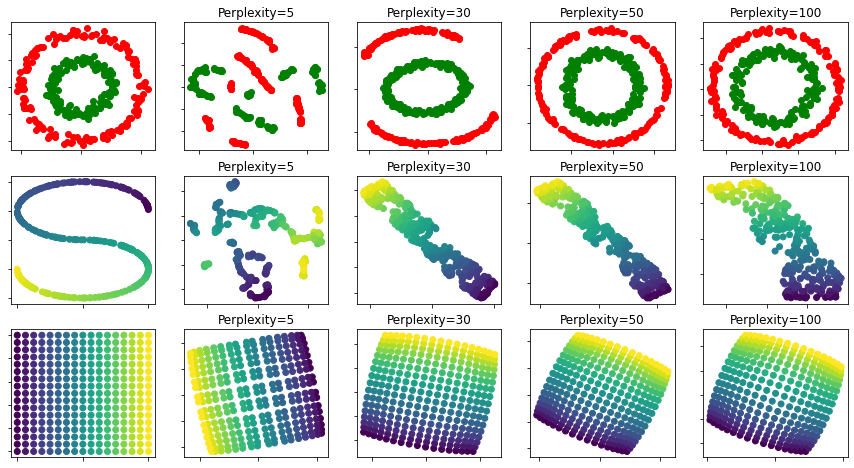

In [28]:
# Author: Narine Kokhlikyan <narine@slice.com>

# License: BSD

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

diags2c=VR.fit_transform(X.reshape(1,*X.shape))

diags2cp=list()
for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    diags2cp.append(VR.fit_transform(Y.reshape(1,*Y.shape)))
    
#T-distributed Stochastic Neighbor Embedding.

#t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to 
#joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of 
#the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. 
#with different initializations we can get different results. 

#The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. 
#Larger datasets usually require a larger perplexity.

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

diagsSv=VR.fit_transform(X.reshape(1,*X.shape))

diagsSvp=list()
for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    diagsSvp.append(VR.fit_transform(Y.reshape(1,*Y.shape)))


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

diagsC2D=VR.fit_transform(X.reshape(1,*X.shape))

diagsC2Dp=list()
for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    diagsC2Dp.append(VR.fit_transform(Y.reshape(1,*Y.shape)))


plt.show()

In [29]:
VR.plot(diags2c)

In [30]:
VR.plot(diags2cp[0])

In [31]:
VR.plot(diags2cp[1])

In [32]:
VR.plot(diags2cp[2])

In [33]:
VR.plot(diags2cp[3])

In [34]:
VR.plot(diagsSv)

In [35]:
VR.plot(diagsSvp[0])

In [36]:
VR.plot(diagsSvp[1])

In [37]:
import gudhi as gd
from pylab import *
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib inline

# Diagramme de persistence en densité

Un diagramme de persistence en densité, ou PD en densité, est une méthode pour représenter la distribution de la persistance des caractéristiques topologiques d'un ensemble de données. Contrairement à un diagramme de persistence standard, qui représente les paires de points (birth, death) pour chaque composante connexe ou trou de l'ensemble de données, un PD en densité représente la densité de points dans un espace bidimensionnel, où l'axe horizontal correspond à la birth et l'axe vertical correspond à la death.

Un PD en densité est utile pour visualiser la distribution de persistance des caractéristiques topologiques d'un ensemble de données, en particulier lorsque l'ensemble de données a une structure complexe ou contient de nombreux bruits. En utilisant un PD en densité, on peut facilement identifier les régions de l'espace bidimensionnel où les caractéristiques topologiques sont plus ou moins persistantes, et où il peut y avoir des informations importantes sur la structure de l'ensemble de données.

Les PD en densité sont souvent utilisés en conjonction avec d'autres outils d'analyse topologique, tels que les diagrammes de Voronoï et les images de persistance, pour obtenir une meilleure compréhension de la topologie des ensembles de données.

<AxesSubplot:title={'center':'Persistence density'}, xlabel='Birth', ylabel='Death'>

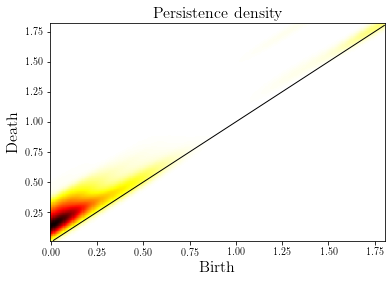

In [38]:
# diagram de persistence en densité
gd.plot_persistence_density(persistence=diagsSv[0])

In [39]:
VR.plot(diagsSvp[0])

<AxesSubplot:title={'center':'Persistence density'}, xlabel='Birth', ylabel='Death'>

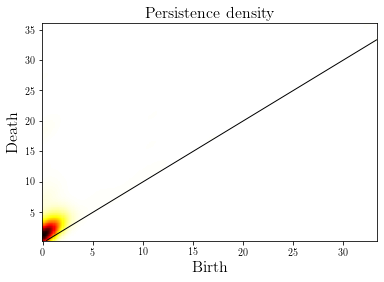

In [40]:
# diagram de persistence en densité
gd.plot_persistence_density(persistence=diagsSvp[0][0])

In [41]:
VR.plot(diagsSvp[3])

In [42]:
#pour voir ce qu'un truc contractible va donner
VR.plot(diagsC2D)

In [43]:
#Ca vous permet de voir ce que donne un truc sans structure topologique remarquable
VR.plot(diagsC2Dp[0])

<AxesSubplot:title={'center':'Persistence density'}, xlabel='Birth', ylabel='Death'>

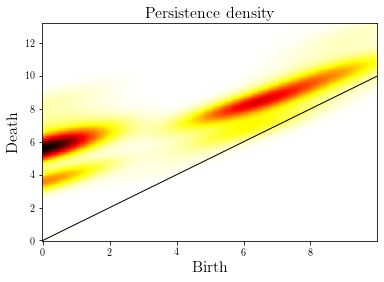

In [44]:
# diagram de persistence en densité
gd.plot_persistence_density(persistence=diagsC2Dp[0][0])

In [45]:
VR.plot(diagsC2Dp[3])

<AxesSubplot:title={'center':'Persistence density'}, xlabel='Birth', ylabel='Death'>

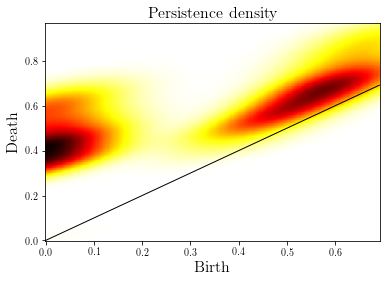

In [46]:
# diagram de persistence en densité
gd.plot_persistence_density(persistence=diagsC2Dp[3][0])

In [47]:
diagsC2Dp[3][0].shape

(541, 3)

# Régression de Morse-Smale et analyse complexe : explorer et caractériser les extrema dans les champs de gradients.

La régression de Morse-Smale est une méthode d'analyse topologique pour trouver et caractériser les extrema (maxima, minima, points selle) dans les champs de gradients de données. Cette méthode est basée sur la décomposition du domaine d'étude en régions topologiquement équivalentes (cellules), qui sont ensuite reliées les unes aux autres par des arcs appelés "bifurcations de Morse". La structure des bifurcations de Morse permet de déterminer la connectivité des régions, ainsi que les directions et les valeurs des pentes des gradients.

L'analyse complexe est une branche des mathématiques qui étudie les fonctions holomorphes et leurs propriétés dans le plan complexe. Dans le cadre de la régression de Morse-Smale, l'analyse complexe est utilisée pour caractériser les points de bifurcation de Morse et les régions topologiquement équivalentes associées. Les outils de l'analyse complexe permettent notamment de calculer les indices de Morse (nombre de points critiques de chaque type), les exposants de Lyapunov (indiquant la vitesse de convergence des itérations), et les courbes de niveau des fonctions de gradients.

En combinant la régression de Morse-Smale et l'analyse complexe, il est possible d'obtenir des informations détaillées sur la topologie et la géométrie des champs de gradients, ainsi que sur la distribution des extrema et des pentes. Cette méthode est utile pour l'analyse de données en sciences, en ingénierie, et dans d'autres domaines où les champs de gradients sont couramment utilisés.

In [48]:
from gtda.diagrams import MorseSmaleComplex
morse_smale_complex(diagsC2Dp[3][0])

ImportError: cannot import name 'MorseSmaleComplex' from 'gtda.diagrams' (/Users/morilla/Python3/lib/python3.7/site-packages/gtda/diagrams/__init__.py)

In [93]:
import dionysus as d
import numpy as np

# create some example data
n = 100
x = np.random.random(n)
y = np.random.random(n)

# define the scalar field to analyze
points = np.array(list(zip(x, y)))  # combine x and y into a numpy array
#f = d.fill_rips(points, 2, 1.0)

# create a filtration
filtration = d.fill_rips(points, 2, 1.0)
#for s in filtration:
#   s.data = max(points[i][1] for i in s)  # use y-coordinate as filtration value

# compute the Morse-Smale complex and its persistence
ms = d.homology_persistence(filtration)
dgm = d.init_diagrams(ms, filtration)

# print the resulting diagrams
print(dgm)

[Diagram with 100 points, Diagram with 22 points, Diagram with 149337 points]


Ce script utilise la bibliothèque Dionysus pour créer une carte de gradient Morse-Smale et calculer sa persistance. Il commence par générer des données d'exemple en créant des tableaux numpy de nombres aléatoires pour les coordonnées x et y d'un ensemble de points. Ensuite, il utilise la fonction "fill_rips" de Dionysus pour créer une représentation de la forme de la collection de points et définit le champ scalaire à analyser en utilisant les coordonnées y des points.

Ensuite, le script crée une filtration des formes en utilisant la même représentation des points avec une valeur de coupure spécifiée. Il crée un objet de complexe Morse-Smale pour cette filtration en utilisant la fonction "homology_persistence" de Dionysus, puis calcule les diagrammes de persistance en utilisant la fonction "init_diagrams".

Finalement, le script imprime les diagrammes de persistance résultants, qui montrent les groupes de trous dans l'ensemble de données, leurs tailles et leur durée de vie.

In [97]:
#dgm = d.init_diagrams(ms, filtration)

d.plot.plot_diagram(dgm[2], show=True)


TypeError: 'dionysus._dionysus.DiagramPoint' object is not iterable

[Diagram with 44 points, Diagram with 0 points, Diagram with 156849 points]


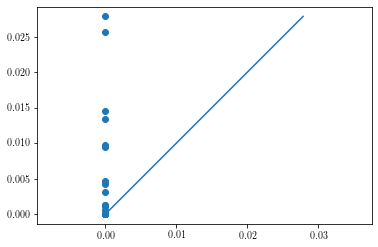

In [51]:
import numpy as np
import dionysus as d
import dionysus.plot as dplt

# define the scalar field to analyze
n = 10  # number of grid points in each direction
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
X, Y = np.meshgrid(x, y)
f = np.exp(-(X**2 + Y**2))

# compute the gradient of the scalar field
dx, dy = np.gradient(f)
grad = np.stack((dx, dy), axis=-1)

# create the filtration using the gradient norm
grad_norm = np.sqrt(np.sum(grad**2, axis=-1))

#filtration2 = d.fill_rips(grad_norm.reshape(-1), 2, 1.0)
filtration2 = d.fill_rips(grad_norm.reshape(-1, 1), 2, 1.0)

# compute the Morse-Smale complex and its persistence
ms2 = d.homology_persistence(filtration2)
dgm2 = d.init_diagrams(ms2, filtration2)

# print the resulting diagrams
print(dgm2)

#visualise
#dgm2 = d.init_diagrams(ms2, f)

d.plot.plot_diagram(dgm2[0], show=True)

In [52]:
grad_norm

array([[0.09272528, 0.11840512, 0.14577098, 0.16615166, 0.17686911,
        0.17686911, 0.16615166, 0.14577098, 0.11840512, 0.09272528],
       [0.11840512, 0.14155126, 0.16488564, 0.17799402, 0.18280152,
        0.18280152, 0.17799402, 0.16488564, 0.14155126, 0.11840512],
       [0.14577098, 0.16488564, 0.1811066 , 0.18164912, 0.17557178,
        0.17557178, 0.18164912, 0.1811066 , 0.16488564, 0.14577098],
       [0.16615166, 0.17799402, 0.18164912, 0.16026629, 0.13181308,
        0.13181308, 0.16026629, 0.18164912, 0.17799402, 0.16615166],
       [0.17686911, 0.18280152, 0.17557178, 0.13181308, 0.06487786,
        0.06487786, 0.13181308, 0.17557178, 0.18280152, 0.17686911],
       [0.17686911, 0.18280152, 0.17557178, 0.13181308, 0.06487786,
        0.06487786, 0.13181308, 0.17557178, 0.18280152, 0.17686911],
       [0.16615166, 0.17799402, 0.18164912, 0.16026629, 0.13181308,
        0.13181308, 0.16026629, 0.18164912, 0.17799402, 0.16615166],
       [0.14577098, 0.16488564, 0.1811066

# Image de persistence

L'algorithme PersImage est une méthode permettant de transformer des diagrammes de persistance en représentations d'images qui peuvent être analysées à l'aide de techniques de vision par ordinateur et de traitement d'images. L'algorithme fonctionne en associant les points d'un diagramme de persistance à des pixels dans une grille d'images, où la valeur de chaque pixel est déterminée par une fonction qui encode des informations sur la persistance de la fonction correspondante dans le diagramme.

Plus précisément, l'algorithme PersImage convertit un diagramme de persistance, qui est une représentation mathématique des caractéristiques topologiques d'un ensemble de données, en une image en niveaux de gris 2D. L'image représente la persistance des caractéristiques dans l'ensemble de données, les pixels plus clairs indiquant des caractéristiques plus persistantes et les pixels plus sombres indiquant des caractéristiques moins persistantes.

L'algorithme PersImage permet de calculer une variété de statistiques sommaires sur l'image de persistance, telles que des moments, des caractéristiques et d'autres descripteurs d'image. Ces statistiques peuvent être utilisées pour comparer et classer des diagrammes de persistance ou pour effectuer des tâches d'apprentissage automatique sur des données topologiques.

Dans l'ensemble, l'algorithme PersImage fournit un outil puissant et flexible pour l'analyse de la topologie des ensembles de données, et il a des applications dans une variété de domaines, y compris la science des données, l'apprentissage automatique, la vision par ordinateur et la géométrie computationnelle.

/Users/morilla/Python3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated class PersImage. (Replaced with the class `persim.PersistenceImager`.) -- Deprecated since version 0.1.5.



PersImage(pixels=(500, 500), spread=0.18, specs={'maxBD': 5, 'minBD': -5}, kernel_type="gaussian", weighting_type="linear")


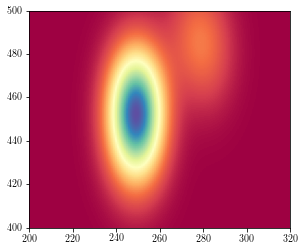

In [53]:
from persim import PersImage
import matplotlib.pyplot as plt

clf = PersImage(pixels=(500,500),specs={"maxBD":5, "minBD":-5}, spread=0.18)
img = clf.transform(diagsC2Dp[3][0])

# Plot the image
plt.imshow(img, cmap='Spectral')

# Set the x and y limits to zoom out
plt.xlim(200, 320)
plt.ylim(400, 500)

# Show the plot
plt.show()


In [54]:
def circleUnif(n=30, radius=1, sigma=0, center=(0, 0)):
    radii = np.random.randn(n) * sigma + radius
    angles = np.random.rand(n) * np.pi * 2

    x = radii * np.cos(angles)
    y = radii * np.sin(angles)

    return np.transpose([x, y]) + center

In [55]:
#import pandas as pd
Circle1 = circleUnif(60, 1, 0, (0,0))
Circle2 = circleUnif(60, 2, 0, (3,3))

Circles = np.concatenate([Circle1, Circle2], axis=0)

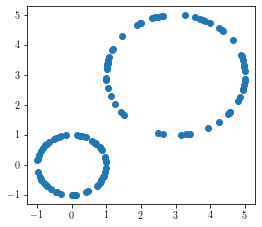

In [56]:
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot(221)
ax.scatter(Circles[:,0], Circles[:,1])
#ax.scatter(Circles[1,:], Circles[1,:])
plt.show()

In [57]:
diags2Cir=VR.fit_transform(Circles.reshape(1,*Circles.shape))
VR.plot(diags2Cir)

In [58]:
diags2Cir

array([[[0.00000000e+00, 1.37516705e-03, 0.00000000e+00],
        [0.00000000e+00, 5.87377697e-03, 0.00000000e+00],
        [0.00000000e+00, 7.90445413e-03, 0.00000000e+00],
        [0.00000000e+00, 1.09322211e-02, 0.00000000e+00],
        [0.00000000e+00, 1.51277706e-02, 0.00000000e+00],
        [0.00000000e+00, 1.70518551e-02, 0.00000000e+00],
        [0.00000000e+00, 1.75090209e-02, 0.00000000e+00],
        [0.00000000e+00, 1.77672375e-02, 0.00000000e+00],
        [0.00000000e+00, 1.98119432e-02, 0.00000000e+00],
        [0.00000000e+00, 2.11896412e-02, 0.00000000e+00],
        [0.00000000e+00, 2.48115323e-02, 0.00000000e+00],
        [0.00000000e+00, 2.66261436e-02, 0.00000000e+00],
        [0.00000000e+00, 2.71984674e-02, 0.00000000e+00],
        [0.00000000e+00, 2.76651680e-02, 0.00000000e+00],
        [0.00000000e+00, 2.78911255e-02, 0.00000000e+00],
        [0.00000000e+00, 3.12952735e-02, 0.00000000e+00],
        [0.00000000e+00, 3.15890983e-02, 0.00000000e+00],
        [0.000

In [59]:
#VR01 = VietorisRipsPersistence(homology_dimensions=[0,1])
#diags2Cir01=VR01.fit_transform(Circles.reshape(1,*Circles.shape))
VR.plot(diags2Cir, homology_dimensions=[0,1])

In [60]:
help(VR.fit_transform)

Help on method fit_transform in module sklearn.base:

fit_transform(X, y=None, **fit_params) method of gtda.homology.simplicial.VietorisRipsPersistence instance
    Fit to data, then transform it.
    
    Fits transformer to ``X`` and ``y`` with optional parameters ``fit_params``
    and returns a transformed version of ``X``.
    
    Parameters
    ----------
    X : ndarray or list of length n_samples
        Input data representing a collection of point clouds if `metric`
        was not set to ``"precomputed"``, and of distance matrices or
        adjacency matrices of weighted undirected graphs otherwise. Can be
        either a 3D ndarray whose zeroth dimension has size ``n_samples``,
        or a list containing ``n_samples`` 2D ndarrays/sparse matrices.
        Point cloud arrays have shape ``(n_points, n_dimensions)``, and if
        `X` is a list these shapes can vary between point clouds. If
        `metric` was set to ``"precomputed"``, then:
    
            - Diagonal e

In [61]:
help(VR.plot)

Help on function plot in module gtda.homology.simplicial:

plot(Xt, sample=0, homology_dimensions=None, plotly_params=None)
    Plot a sample from a collection of persistence diagrams, with
    homology in multiple dimensions.
    
    Parameters
    ----------
    Xt : ndarray of shape (n_samples, n_features, 3)
        Collection of persistence diagrams, such as returned by
        :meth:`transform`.
    
    sample : int, optional, default: ``0``
        Index of the sample in `Xt` to be plotted.
    
    homology_dimensions : list, tuple or None, optional, default: ``None``
        Which homology dimensions to include in the plot. ``None`` means
        plotting all dimensions present in ``Xt[sample]``.
    
    plotly_params : dict or None, optional, default: ``None``
        Custom parameters to configure the plotly figure. Allowed keys are
        ``"traces"`` and ``"layout"``, and the corresponding values should
        be dictionaries containing keyword arguments as would be f

In [62]:
#import pandas as pd
Circle3 = circleUnif(60, 1, 0.05, (0,0))
Circle4 = circleUnif(60, 2, 0.03, (3,3))

Circles2 = np.concatenate([Circle3, Circle4], axis=0)

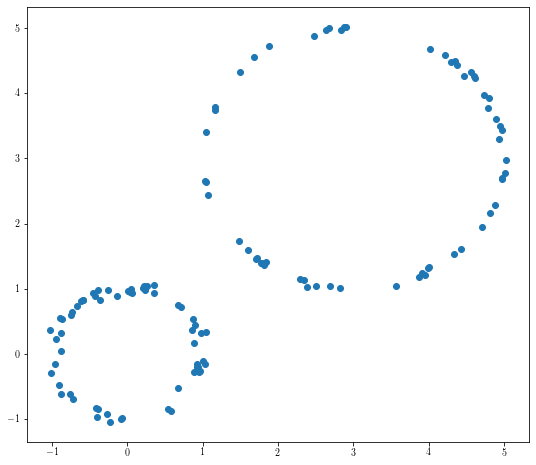

In [63]:
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot()
ax.scatter(Circles2[:,0], Circles2[:,1])
#ax.scatter(Circles[1,:], Circles[1,:])
plt.show()

In [64]:
diags2Cir2=VR.fit_transform(Circles2.reshape(1,*Circles2.shape))
VR.plot(diags2Cir2)

# Nuage de points tirés de façon uniforme dans le cube unité (pour voir ce qu'un truc contractible va donner)

In [65]:
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

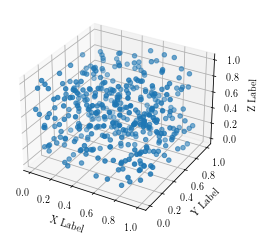

In [66]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Another example using a 3D uniform grid
n_samples = 400 # Vérifier ce qu'est passe au augmenter le nombre de samples!
xs = randrange(n_samples, 0, 1)
ys = randrange(n_samples, 0, 1)
zs = randrange(n_samples, 0, 1)

ax.scatter(xs, ys, zs)
#ax.scatter(xx, yy, zz)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [67]:
#voir ce que donne un truc sans structure topologique remarquable
XCU = np.array((xs,ys,zs))
diags3Dcub=VR.fit_transform(XCU.reshape(1,*XCU.shape))
VR.plot(diags3Dcub)

# On reprend les premiers exemples en mettant un outlier (un point très loin des cercles) et on refait les diagrammes

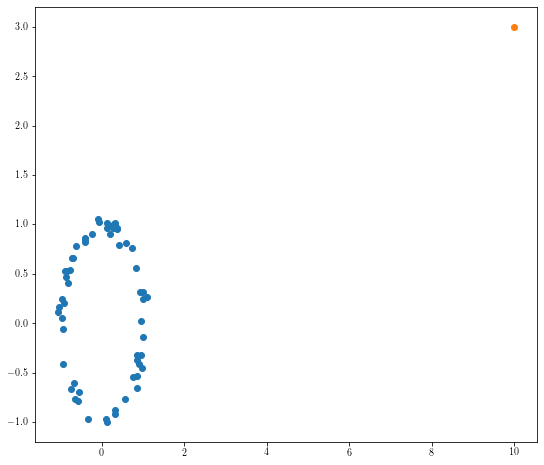

In [68]:
Circleout = circleUnif(60, 1, 0.05, (0,0))
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot()
ax.scatter(Circleout[:,0], Circleout[:,1])
ax.scatter(10,3)
#ax.scatter(Circles[1,:], Circles[1,:])
plt.show()

In [69]:
#Circleout est un ndarray, donc...
Circleoutp = np.insert(Circleout, 60, 3, axis=0)

In [70]:
diagscircleout = VR.fit_transform(Circleout.reshape(1,*Circleout.shape))
VR.plot(diagscircleout)


In [71]:
diagscircleoutp = VR.fit_transform(Circleoutp.reshape(1,*Circleoutp.shape))
VR.plot(diagscircleoutp)

# Cela nous permet de signaler la sensibilité des méthodes de TDA aux outliers

# On peut alors parler de la DTM (distance to a measure) pour gérer ce genre de problème

Malgré de fortes propriétés de stabilité, l'homologie persistante des filtrations classiquement utilisées en Analyse de Données Topologiques, telles que les filtrations de Cech ou Vietoris-Rips, sont très sensibles à la présence de valeurs aberrantes dans les données à partir desquelles elles sont calculées. Dans cet article, nous présentons et étudions une nouvelle famille de filtrations, les DTM-filtrations, construites sur des nuages de points dans l'espace euclidien qui sont plus robustes au bruit et aux valeurs aberrantes. L'approche adoptée dans ce travail repose sur la notion de fonctions de distance à mesure, et étend certains travaux précédents sur l'approximation de telles fonctions.

Anai et al., 2020. Arxiv. Veuillez consulter la page 12 !

La fonction dtm calcule la "fonction de distance à mesure" sur un ensemble de points Grid, en utilisant la mesure empirique uniforme sur un ensemble de points $X$. Étant donné une mesure de probabilité $P$, la fonction de distance à mesure, pour chaque y dans $R^d$, est définie par

$$d_{m_{0}}(y) = (\frac{1}{m_{0}}\int_{0}^{m_{0}}G_y^{-1}(u))^{r} du)^{1/r},$$

où $G_y(t) = P(||X-y|| ≤ t)$, et où $m_{0}$ dans $(0,1)$ et $r$ dans $[1,\infty)$ sont des paramètres d'accordage. Lorsque $m_{0}$ augmente, la fonction DTM devient plus lisse/smooth, donc m0 peut être compris comme un paramètre de lissage/smoothing. $r$ affecte moins mais modifie également la fonction DTM. Le DTM peut être considéré comme une version lissée de la fonction de distance. Voir les détails et les références.

Étant donné $X={x_1, …, x_n}$, la version empirique de la distance à la mesure est

$\hat d_{m_{0}}(y) = (1/k ∑_{x_i \in N_k(y)} ||x_i-y||^r)^{1/r}$,

où $k= \lceil m_{0} * n \rceil$ et $N_k(y)$ est l'ensemble contenant les k voisins les plus proches de y parmi $x_1, …, x_n$.

In [72]:
import os
import sys
#from torchvision import datasets, transforms
sys.path.append("DTM_filtrations.py")

In [73]:
import DTM_filtrations

In [74]:
def DTM(X,query_pts,m):
    '''
    Compute the values of the DTM (with exponent p=2) of the empirical measure of a point cloud X
    Require sklearn.neighbors.KDTree to search nearest neighbors
    
    Input:
    X: a nxd numpy array representing n points in R^d
    query_pts:  a kxd numpy array of query points
    m: parameter of the DTM in [0,1)
    
    Output: 
    DTM_result: a kx1 numpy array contaning the DTM of the 
    query points
    
    Example:
    X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
    Q = np.array([[0,0],[5,5]])
    DTM_values = DTM(X, Q, 0.3)
    '''
    import math
    from sklearn.neighbors import KDTree
    
    N_tot = X.shape[0]     
    k = math.floor(m*N_tot)+1   # number of neighbors

    kdt = KDTree(X, leaf_size=30, metric='euclidean')
    NN_Dist, NN = kdt.query(query_pts, k, return_distance=True)  

    DTM_result = np.sqrt(np.sum(NN_Dist*NN_Dist,axis=1) / k)
    
    return(DTM_result)

Cette fonction calcule les valeurs du DTM (avec l'exposant p=2) de la mesure empirique d'un nuage de points X pour un ensemble de points de requête. Le DTM (Distance to Measure) est une mesure de distance entre un point et une distribution de probabilité (mesure de probabilité). Il s'agit d'une méthode pour calculer une fonction de distance à partir d'un ensemble de points, qui est plus robuste que les filtrations classiques utilisées en analyse de données topologiques, telles que la filtration de Cech ou de Vietoris-Rips.

La fonction prend en entrée un tableau numpy n x d représentant n points dans R^d, un tableau numpy k x d de points de requête, et un paramètre m du DTM compris entre 0 et 1. La fonction renvoie un tableau numpy k x 1 contenant les valeurs du DTM pour chaque point de requête. La fonction utilise la méthode de recherche des k voisins les plus proches (avec k calculé à partir de m et du nombre de points dans X) pour calculer les distances entre les points de requête et les points de X, puis calcule la racine carrée de la somme des carrés de ces distances divisée par k.

La fonction utilise la bibliothèque Python scikit-learn pour effectuer la recherche des k voisins les plus proches. Elle peut être utilisée pour effectuer des calculs de distance plus robustes pour l'analyse de données topologiques ou pour toute autre application nécessitant une mesure de distance robuste entre un point et une distribution de probabilité.

Text(0.5, 1.0, 'Values of the DTM on X with parameter m=0.1')

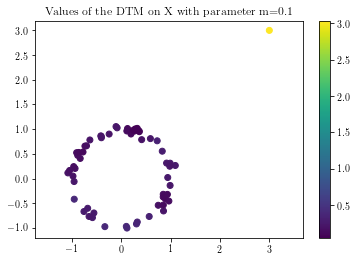

In [75]:
' Compute the DTM on X ' 
# compute the values of the DTM of parameter m
m = 0.1                            
DTM_values = DTM(Circleoutp,Circleoutp,m)             

# plot of the DTM
plot=plt.scatter(Circleoutp[:,0], Circleoutp[:,1], c=DTM_values)
plt.colorbar(plot)
plt.axis('equal')
plt.title('Values of the DTM on X with parameter m='+str(m))

diagram_DTM = np.array([[[(1, (0.4657536838075277, 1.0024982298140144)), (0, (0.08689166599995744, 10)), (0, (0.1100131089211926, 0.4648055582169441)), (0, (0.10219403011264977, 0.4013120717678243)), (0, (0.15233887734354606, 0.40973870052054234)), (0, (3.0439748442181305, 3.2470399367862335)), (0, (0.15817080661358887, 0.34861804679673225)), (0, (0.18115297786260023, 0.34642849764867)), (0, (0.16141543138783054, 0.24598507336511782)), (0, (0.3660172214303413, 0.45019705952099776)), (0, (0.25937088773712813, 0.3391050229823814)), (0, (0.21712903859580843, 0.2944693674527818)), (0, (0.2731986653505711, 0.34464071672791996)), (0, (0.36293535353656226, 0.4337735619116246)), (0, (0.2708484588062338, 0.34156500141407364)), (0, (0.24928338630378155, 0.315974307153073)), (0, (0.28213960905607643, 0.3472635224208255)), (0, (0.22278225260794654, 0.2817458348010035)), (0, (0.207750155534581, 0.26076840937082807)), (0, (0.23412674540274328, 0.28048340776583386)), (0, (0.30196550365748, 0.34791815498256456)), (0, (0.22648841472499015, 0.2701754892325565)), (0, (0.24559606334888542, 0.289239774023917)), (0, (0.19849272536389018, 0.24194114297098826)), (0, (0.14153276212071084, 0.18410383018839793)), (0, (0.2256515805391782, 0.2681611449038641)), (0, (0.10605601486419472, 0.1475399507034746)), (0, (0.1910859222158442, 0.23217999473743536)), (0, (0.19739988138128103, 0.2359291881902748)), (0, (0.19627619230794616, 0.23325229423611651)), (0, (0.2135772913296335, 0.25050073039597137)), (0, (0.16993262136524134, 0.20685008743205777)), (0, (0.21359829163974148, 0.24918011133293996)), (0, (0.11876778439207787, 0.15313892041278196)), (0, (0.24428566251139733, 0.2782396233754789)), (0, (0.13200303785773498, 0.16373501591752398)), (0, (0.16232647926399696, 0.19251246250480855)), (0, (0.1141453905620261, 0.14409180694845405)), (0, (0.18948303236368072, 0.21929338877557525)), (0, (0.1501570565465396, 0.17863285257346972)), (0, (0.16390320034372927, 0.19185722398919475)), (0, (0.1891744603397447, 0.2168293894309377)), (0, (0.11306888491710469, 0.1407000517315046)), (0, (0.11760052027170241, 0.1436126517704651)), (0, (0.11669302747214638, 0.14102972570530992)), (0, (0.28232458145630746, 0.3064027745042311)), (0, (0.23342426543719574, 0.25665884440858117)), (0, (0.1723038008751532, 0.19196437192824034)), (0, (0.16655307670988903, 0.1858913935294129)), (0, (0.2717395048035599, 0.2897420652309761)), (0, (0.223442226577824, 0.24074574391012543)), (0, (0.2803334150012876, 0.29602650661088764)), (0, (0.11053626011550491, 0.12433389387429922)), (0, (0.15665345553837684, 0.17006695993244267)), (0, (0.12116930897971762, 0.13429363454300547)), (0, (0.14225325870709846, 0.15516759352036447)), (0, (0.20569979254912496, 0.21762967909472852)), (0, (0.1419207872063111, 0.15105542518478027)), (0, (0.20505775240939791, 0.21366147108202357)), (0, (0.08933968022042486, 0.09790710655858528)), (0, (0.13907838613918017, 0.14534359024322324)), (0, (0.1159812604461532, 0.11731665408399795))]]])

In [76]:
 def SampleOnCircle(N_obs = 100, N_out = 0, is_plot = False):
    '''
    Sample N_obs points (observations) points from the uniform distribution on the unit circle in R^2, 
        and N_out points (outliers) from the uniform distribution on the unit square  
        
    Input: 
    N_obs: number of sample points on the circle
    N_noise: number of sample points on the square
    is_plot = True or False : draw a plot of the sampled points            
    
    Output : 
    data : a (N_obs + N_out)x2 matrix, the sampled points concatenated 
    '''
    rand_uniform = np.random.rand(N_obs)*2-1    
    X_obs = np.cos(2*np.pi*rand_uniform)
    Y_obs = np.sin(2*np.pi*rand_uniform)

    X_out = np.random.rand(N_out)*2-1
    Y_out = np.random.rand(N_out)*2-1

    X = np.concatenate((X_obs, X_out))
    Y = np.concatenate((Y_obs, Y_out))
    data = np.stack((X,Y)).transpose()

    if is_plot:
        fig, ax = plt.subplots()
        plt_obs = ax.scatter(X_obs, Y_obs, c='tab:cyan');
        plt_out = ax.scatter(X_out, Y_out, c='tab:orange');
        ax.axis('equal')
        ax.set_title(str(N_obs)+'-sampling of the unit circle with '+str(N_out)+' outliers')
        ax.legend((plt_obs, plt_out), ('data', 'outliers'), loc='lower left')
    return data

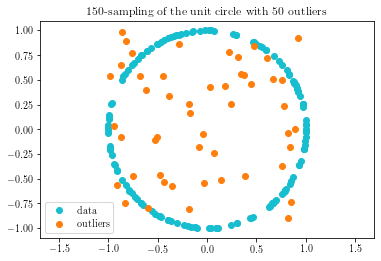

In [77]:
' Sampling on the circle with outlier '
N_obs = 150                                     # number of points sampled on the circle
N_out = 50                                      # number of outliers 
X = SampleOnCircle(N_obs, N_out, is_plot=True)  # sample points with outliers

In [78]:
diagsSamp = VR.fit_transform(X.reshape(1,*X.shape))
VR.plot(diagsSamp)
#'Persistence diagram of the Rips complex'
#1-homology feature of the circle does not appear clearly here ($\beta_1 = 1$)

Text(0.5, 1.0, 'Values of the DTM on X with parameter m=0.1')

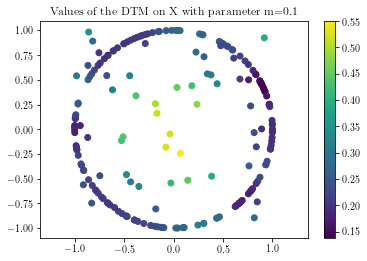

In [79]:
' Compute the DTM on X ' 
# compute the values of the DTM of parameter m
m = 0.1                            
DTM_values = DTM(X,X,m)             

# plot of the DTM
plot=plt.scatter(X[:,0], X[:,1], c=DTM_values)
plt.colorbar(plot)
plt.axis('equal')
plt.title('Values of the DTM on X with parameter m='+str(m))

# Exercices

Voici quelques exercices en utilisant Giotto-tda pour travailler avec des diagrammes de persistance, des images de persistance et des diagrammes de persistance en densité :

Diagrammes de persistance :
 1. Utilisez Giotto-tda pour extraire les diagrammes de persistance à partir d'un ensemble de données de points en 2D.     Visualisez les diagrammes de persistance et identifiez les composantes connexes importantes.
 2. Utilisez Giotto-tda pour calculer la distance de Bottleneck entre deux diagrammes de persistance et évaluez leur       similarité.
 3. Utilisez Giotto-tda pour extraire des caractéristiques topologiques importantes à partir de diagrammes de         
    persistance à l'aide d'algorithmes tels que la transformée de Morse-Smale.
    
Images de persistance :
1. Utilisez Giotto-tda pour générer des images de persistance à partir de diagrammes de persistance et visualisez-les    pour mieux comprendre la structure topologique des données.
2. Utilisez Giotto-tda pour extraire des caractéristiques topologiques importantes à partir d'images de persistance à    l'aide d'algorithmes tels que la transformée de Morse-Smale.

Diagrammes de persistance en densité :
1. Utilisez Giotto-tda pour calculer les diagrammes de persistance en densité à partir d'un ensemble de données de    
   points en 2D. Visualisez les diagrammes de persistance en densité et identifiez les composantes connexes  
   importantes.
2. Utilisez Giotto-tda pour extraire des caractéristiques topologiques importantes à partir de diagrammes de  
   persistance en densité à l'aide d'algorithmes tels que la transformée de Morse-Smale.

Ces exercices devraient vous donner une idée de la façon dont Giotto-tda peut être utilisé pour travailler avec des diagrammes de persistance, des images de persistance et des diagrammes de persistance en densité. Il existe de nombreux autres exercices possibles, en fonction des données que vous travaillez et des problèmes que vous souhaitez résoudre.







# Solutions

Voici des solutions possibles pour les exercices que j'ai proposés précédemment en utilisant Giotto-tda :

1. Diagrammes de persistance :
- Pour extraire les diagrammes de persistance à partir d'un ensemble de données de points en 2D, vous pouvez utiliser la fonction dgm = gtda.persistence_diagrams(points) de Giotto-tda. Pour visualiser les diagrammes de persistance, vous pouvez utiliser la fonction gtda.plot_diagram(dgm). Pour identifier les composantes connexes importantes, vous pouvez rechercher les diagrammes de persistance avec des points à haute densité ou avec des caractéristiques topologiques significatives.

- Pour calculer la distance de Bottleneck entre deux diagrammes de persistance, vous pouvez utiliser la fonction gtda.bottleneck_distance(dgm1, dgm2). Cette fonction calcule la distance de Bottleneck entre les deux diagrammes de persistance donnés et renvoie une valeur qui mesure leur similarité.

- Pour extraire des caractéristiques topologiques importantes à partir de diagrammes de persistance, vous pouvez utiliser des algorithmes tels que la transformée de Morse-Smale, qui permet de détecter les points critiques dans les diagrammes de persistance. Vous pouvez utiliser la fonction gtda.morse_smale_complex(dgm) pour calculer la transformée de Morse-Smale d'un diagramme de persistance donné.

2. Images de persistance :
- Pour générer des images de persistance à partir de diagrammes de persistance, vous pouvez utiliser la fonction gtda.persistence_image(dgm) de Giotto-tda. Cette fonction calcule une image de persistance à partir du diagramme de persistance donné et renvoie une matrice d'images.

- Pour extraire des caractéristiques topologiques importantes à partir d'images de persistance, vous pouvez utiliser des algorithmes tels que la transformée de Morse-Smale. Vous pouvez utiliser la fonction gtda.morse_smale_complex(dgm) pour calculer la transformée de Morse-Smale d'un diagramme de persistance donné.

3. Diagrammes de persistance en densité :
- Pour calculer les diagrammes de persistance en densité à partir d'un ensemble de données de points en 2D, vous pouvez utiliser la fonction dgm_density = gtda.persistence_density(points) de Giotto-tda. Pour visualiser les diagrammes de persistance en densité, vous pouvez utiliser la fonction gtda.plot_density(dgm_density). Pour identifier les composantes connexes importantes, vous pouvez rechercher les diagrammes de persistance en densité avec des densités significatives.

- Pour extraire des caractéristiques topologiques importantes à partir de diagrammes de persistance en densité, vous pouvez utiliser des algorithmes tels que la transformée de Morse-Smale. Vous pouvez utiliser la fonction gtda.morse_smale_complex(dgm_density) pour calculer la transformée de Morse-Smale d'un diagramme de persistance en densité donné.

Ces solutions sont un exemple de ce que vous pouvez faire avec Giotto-tda pour travailler avec des diagrammes de persistance, des images de persistance et des diagrammes de persistance en densité. Vous pouvez également expérimenter avec d'autres fonctions et algorithmes de Giotto-tda pour résoudre des problèmes spécifiques que vous rencontrez avec vos données.

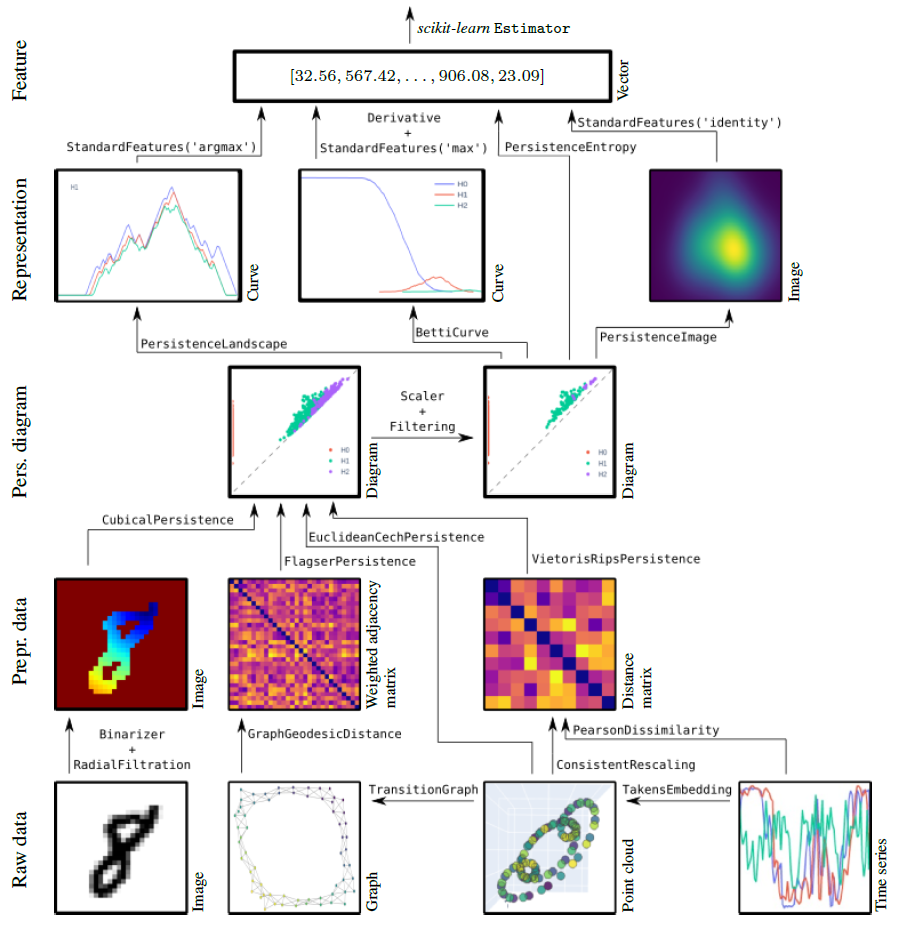